In [1]:
!ls /home/dsc/Data/challenge/

bookings.csv  bookings.csv.bz2	searches.csv  searches.csv.bz2


In [1]:
path = "/home/dsc/Data/challenge/"
booking_path = path + "bookings.csv.bz2"
searches_path = path + "searches.csv.bz2"
!ls -l --block-size=M {path}

total 8564M
-rw-rw-r--  1 dsc dsc 4049M Jan  4  2016 bookings.csv
-rw-rw-r--  1 dsc dsc  530M Jan  4  2016 bookings.csv.bz2
-rw-rw-r--  1 dsc dsc 3525M Jan  4  2016 searches.csv
-rw-rw-r--. 1 dsc dsc  461M Jan  4  2016 searches.csv.bz2


In [5]:
!bzip2 --help

bzip2, a block-sorting file compressor.  Version 1.0.6, 6-Sept-2010.

   usage: bzip2 [flags and input files in any order]

   -h --help           print this message
   -d --decompress     force decompression
   -z --compress       force compression
   -k --keep           keep (don't delete) input files
   -f --force          overwrite existing output files
   -t --test           test compressed file integrity
   -c --stdout         output to standard out
   -q --quiet          suppress noncritical error messages
   -v --verbose        be verbose (a 2nd -v gives more)
   -L --license        display software version & license
   -V --version        display software version & license
   -s --small          use less memory (at most 2500k)
   -1 .. -9            set block size to 100k .. 900k
   --fast              alias for -1
   --best              alias for -9

   If invoked as `bzip2', default action is to compress.
              as `bunzip2',  default action is to decompress.
        

In [43]:
!ls {booking_path}

/home/dsc/Data/challenge/bookings.csv.bz2


In [44]:
!bzcat {booking_path} | head

act_date           ^source^pos_ctry^pos_iata^pos_oid  ^rloc          ^cre_date           ^duration^distance^dep_port^dep_city^dep_ctry^arr_port^arr_city^arr_ctry^lst_port^lst_city^lst_ctry^brd_port^brd_city^brd_ctry^off_port^off_city^off_ctry^mkt_port^mkt_city^mkt_ctry^intl^route          ^carrier^bkg_class^cab_class^brd_time           ^off_time           ^pax^year^month^oid      
2013-03-05 00:00:00^1A    ^DE      ^a68dd7ae953c8acfb187a1af2dcbe123^1a11ae49fcbf545fd2afc1a24d88d2b7^ea65900e72d71f4626378e2ebd298267^2013-02-22 00:00:00^1708^0^ZRH     ^ZRH     ^CH      ^LHR     ^LON     ^GB      ^ZRH     ^ZRH     ^CH      ^LHR     ^LON     ^GB      ^ZRH     ^ZRH     ^CH      ^LHRZRH  ^LONZRH  ^CHGB    ^1^LHRZRH         ^VI^T        ^Y        ^2013-03-07 08:50:00^2013-03-07 11:33:37^-1^2013^3^NULL     
2013-03-26 00:00:00^1A    ^US      ^e612b9eeeee6f17f42d9b0d3b79e75ca^7437560d8f276d6d05eeb806d9e7edee^737295a86982c941f1c2da9a46a14043^2013-03-26 00:00:00^135270^0^SAL     ^SAL     ^SV      ^

In [45]:
!bzcat {path}{searches_file} | head

Date^Time^TxnCode^OfficeID^Country^Origin^Destination^RoundTrip^NbSegments^Seg1Departure^Seg1Arrival^Seg1Date^Seg1Carrier^Seg1BookingCode^Seg2Departure^Seg2Arrival^Seg2Date^Seg2Carrier^Seg2BookingCode^Seg3Departure^Seg3Arrival^Seg3Date^Seg3Carrier^Seg3BookingCode^Seg4Departure^Seg4Arrival^Seg4Date^Seg4Carrier^Seg4BookingCode^Seg5Departure^Seg5Arrival^Seg5Date^Seg5Carrier^Seg5BookingCode^Seg6Departure^Seg6Arrival^Seg6Date^Seg6Carrier^Seg6BookingCode^From^IsPublishedForNeg^IsFromInternet^IsFromVista^TerminalID^InternetOffice
2013-01-01^20:25:57^MPT^624d8c3ac0b3a7ca03e3c167e0f48327^DE^TXL^AUH^1^2^TXL^AUH^2013-01-26^D2^^AUH^TXL^2013-02-02^D2^^^^^^^^^^^^^^^^^^^^^^1ASIWS^0^0^0^d41d8cd98f00b204e9800998ecf8427e^FRA
2013-01-01^10:15:33^MPT^b0af35b31588dc4ab06d5cf2986e8e02^MD^ATH^MIL^0^1^ATH^MIL^2013-01-04^^^^^^^^^^^^^^^^^^^^^^^^^^^^1ASIWS^0^0^0^d41d8cd98f00b204e9800998ecf8427e^KIV
2013-01-01^18:04:49^MPT^3561a60621de06ab1badc8ca55699ef3^US^ICT^SFO^1^2^ICT^SFO^2013-08-02^^^SFO^ICT^2013-08-09^^^^

In [46]:
# We will decompress the files for gain performance. We keep the originals
%time !bzip2 -dk {booking_path}

CPU times: user 1.52 s, sys: 254 ms, total: 1.78 s
Wall time: 1min 58s


In [47]:
!ls -l {path}

total 5159236
-rw-rw-r--  1 dsc dsc 4244874509 Jan  4  2016 bookings.csv
-rw-rw-r--  1 dsc dsc  554970628 Jan  4  2016 bookings.csv.bz2
-rw-rw-r--. 1 dsc dsc  483188920 Jan  4  2016 searches.csv.bz2


In [48]:
%time !bzip2 -dk {searches_path}

CPU times: user 1.29 s, sys: 249 ms, total: 1.54 s
Wall time: 1min 51s


In [49]:
!ls -l {path}

total 8768840
-rw-rw-r--  1 dsc dsc 4244874509 Jan  4  2016 bookings.csv
-rw-rw-r--  1 dsc dsc  554970628 Jan  4  2016 bookings.csv.bz2
-rw-rw-r--  1 dsc dsc 3696229366 Jan  4  2016 searches.csv
-rw-rw-r--. 1 dsc dsc  483188920 Jan  4  2016 searches.csv.bz2


### Exercise 1

Count the number of lines in Python for each file

In [2]:
import pandas as pd

In [4]:
booking_path = path + "bookings.csv"
searches_path = path + "searches.csv"
chunksize=1000
# Use usecols for better the performance. The gain in time is the 100%
book_reader = pd.read_csv(booking_path, sep='^', chunksize=chunksize, usecols={'pos_iata', 'pos_ctry'})
# http://pandas.pydata.org/pandas-docs/stable/io.html#io-chunking
rownum = 0
for chunk in book_reader:
    rownum += len(chunk)

print rownum
# Rownum = 10000010

10000010


In [5]:
search_reader = pd.read_csv(searches_path, sep='^', chunksize=chunksize, usecols={'TxnCode', 'OfficeID'})
# http://pandas.pydata.org/pandas-docs/stable/io.html#io-chunking
rownum_search = 0
for chunk in search_reader:
    rownum_search += len(chunk)

print rownum_search
# rownum_search = 20390198

20390198


In [6]:
# Close readers. Que
book_reader.close()
search_reader.close()

### Exercise 2

**Top 10 arrival airports in the world in 2013 (using the bookings file).**

* Arrival airport is the column arr_port. It is the IATA code for the airport

* To get the total number of passengers for an airport, you can sum the column pax, grouping by arr_port. Note that there is negative pax. That corresponds to cancelations. So to get the total number of passengers that have actually booked, you should sum including the negatives (that will remove the canceled bookings).

* Print the top 10 arrival airports in the standard output, including the number of passengers.

* **Bonus point**: Get the name of the city or airport corresponding to that airport (programatically, we suggest to have a look at **GeoBases in Github**)

* **Bonus point**: Solve this problem using pandas (instead of any other approach)

In [33]:
chunksize=50000
book_reader = pd.read_csv(booking_path, sep='^', chunksize=chunksize, usecols={'arr_port', 'pax'})
#book_reader.next().columns
# Quiza crear un df vacio. iterar por el reader y hacer el group by de cada chunk y concatenar el resultado con el df auxiliar
# The column 13 is arr_port and is composed for her iata code

In [34]:
#df = book_reader.next()
#df.groupby('arr_port')['pax'].sum().sort_values(ascending=False).head(10)
# Create empty serie para ir rellenandola. Si da problemas hacer un add con 0 fillna flag
serie = pd.Series()
for chunk in book_reader:
    # Habria que combinar cada serie que obtenemos con la anterior. Quiza crear serie vacia antes e ir concatenando o uniendo o ver como
    serie = serie.add(fill_value=0, other=chunk.groupby('arr_port')['pax']\
                        .sum()\
                        .sort_values(ascending=False)\
                        .head(10))
# Clean whitespaces and get top 10
top_pax_by_airport = serie.sort_values(ascending=False).head(10)
top_pax_by_airport.index = map(lambda x: x.strip(), top_pax_by_airport.index)
top_pax_by_airport

LHR    88809.0
MCO    69170.0
LAX    68320.0
LAS    66920.0
CDG    60650.0
JFK    54540.0
BKK    49930.0
SFO    43270.0
MIA    42050.0
DXB    35790.0
dtype: float64

**BONUS**

In [36]:
# From pypi error ocurred. Don`t match that package for easy-install. We use git method. The cloning is so slow ...
# git clone /home/dsc/Repositories/ https://github.com/opentraveldata/geobases
from GeoBases import GeoBase

# We add the name of airport by his iata code
geo_o = GeoBase(data='airports', verbose=False)
airports_list = [geo_o.get(x, 'name', default=x) for x in top_pax_by_airport.index]
top_pax_by_airport.index = airports_list

top_pax_by_airport

London Heathrow Airport                 88809.0
Orlando International Airport           69170.0
Los Angeles International Airport       68320.0
McCarran International Airport          66920.0
Paris - Charles-de-Gaulle               60650.0
John F Kennedy International Airport    54540.0
Suvarnabhumi                            49930.0
San Francisco International Airport     43270.0
Miami International Airport             42050.0
Dubai International Airport             35790.0
dtype: float64

### Exercise 3

**Plot the monthly number of searches for flights arriving at Málaga, Madrid or Barcelona**

* For the arriving airport, you can use the Destination column in the searches file. 
* Plot a curve for Málaga, another one for Madrid, and another one for Barcelona, in the same figure.

* **Bonus point**: Solving this problem using pandas (instead of any other approach)

In [9]:
search_reader = pd.read_csv(searches_path, sep='^', chunksize=chunksize, usecols={'Date', 'Destination'})

#Let's check if the searches are from the same year. Seem that the csv is order by date
max_date = 0
for chunk in search_reader:    
    date_aux = pd.to_datetime(chunk['Date'], format='%Y%m%d', errors='ignore')
    max_date = date_aux.max()

# TODO Investigate which dates are wrong and why
print max_date


2013-10-13


In [196]:
%pylab inline
# Seem that all researchs were in 2013
search_reader = pd.read_csv(searches_path, sep='^', chunksize=chunksize, usecols={'Date', 'Destination'})

#1. Miramos el iata code para los lugares https://es.wikipedia.org/wiki/C%C3%B3digo_de_aeropuertos_de_IATA
# Malaga : AGP, Madrid : MAD, Barcelona : BCN
list_codes = ['AGP', 'MAD', 'BCN']
df = pd.DataFrame()

for chunk in search_reader:

    # Filter by destination
    chunk = chunk[chunk['Destination'].isin(list_codes)]

    # Cast the column from String to datetime and get the month
    chunk['Date'] = pd.to_datetime(chunk['Date'], format='%Y-%m-%d', errors='coerce').map(lambda x : x.month)

    df_group = chunk.groupby(['Date','Destination'])['Destination'].agg({'Researchs' : 'count'}).unstack()

    # We drop the first level that have in columns after pivot the second index as column name
    df_group.columns = df_group.columns.droplevel()
    
    df = df.add(df_group, fill_value=0)
df


Populating the interactive namespace from numpy and matplotlib


Destination,AGP,BCN,MAD
Date,,,
1,9633.0,29469.0,24258.0
2,8379.0,28329.0,22800.0
3,10659.0,30552.0,24681.0
4,8265.0,31236.0,25251.0
5,10830.0,28728.0,26334.0
6,7923.0,26505.0,22800.0
7,8892.0,29241.0,22971.0
8,7866.0,27075.0,21831.0
9,8151.0,23427.0,21147.0


In [197]:
# We going to translate the num of month by her name
import calendar

# Numerics indexes
data_index = df.index.get_level_values(level=0)

# Translation
names_date_index = map(lambda x : calendar.month_abbr[x], data_index)

# Format the num of month for her name. We don`t realise this priorly for not lose the order.
df.index = names_date_index
df

Destination,AGP,BCN,MAD
Jan,9633.0,29469.0,24258.0
Feb,8379.0,28329.0,22800.0
Mar,10659.0,30552.0,24681.0
Apr,8265.0,31236.0,25251.0
May,10830.0,28728.0,26334.0
Jun,7923.0,26505.0,22800.0
Jul,8892.0,29241.0,22971.0
Aug,7866.0,27075.0,21831.0
Sep,8151.0,23427.0,21147.0
Oct,6499.0,20276.0,22294.0


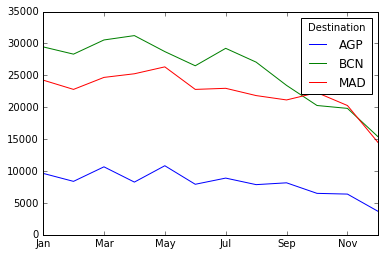

In [224]:
df.plot()

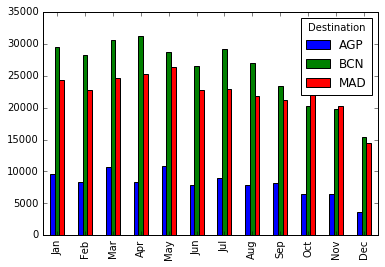

In [203]:
# the bar plot can be more visual
df.plot(kind='bar')

### Exercise 4

**Match searches with bookings**

* For every search in the searches file, find out whether the search ended up in a booking or not (using the info in the bookings file). For instance, search and booking origin and destination should match. 
* For the bookings file, origin and destination are the columns dep_port and arr_port, respectively. 
* Generate a CSV file with the search data, and an additional field, containing 1 if the search ended up in a booking, and 0 otherwise.

### Exercise 5

**Write a Web Service**

* Wrap the output of the second exercise in a web service that returns the data in JSON format (instead of printing to the standard output).
* The web service should accept a parameter n>0. For the top 10 airports, n is 10. For the X top airports, n is X 

In [ ]:
# Ver como montar un buen json con su mensaje de error si n <=0